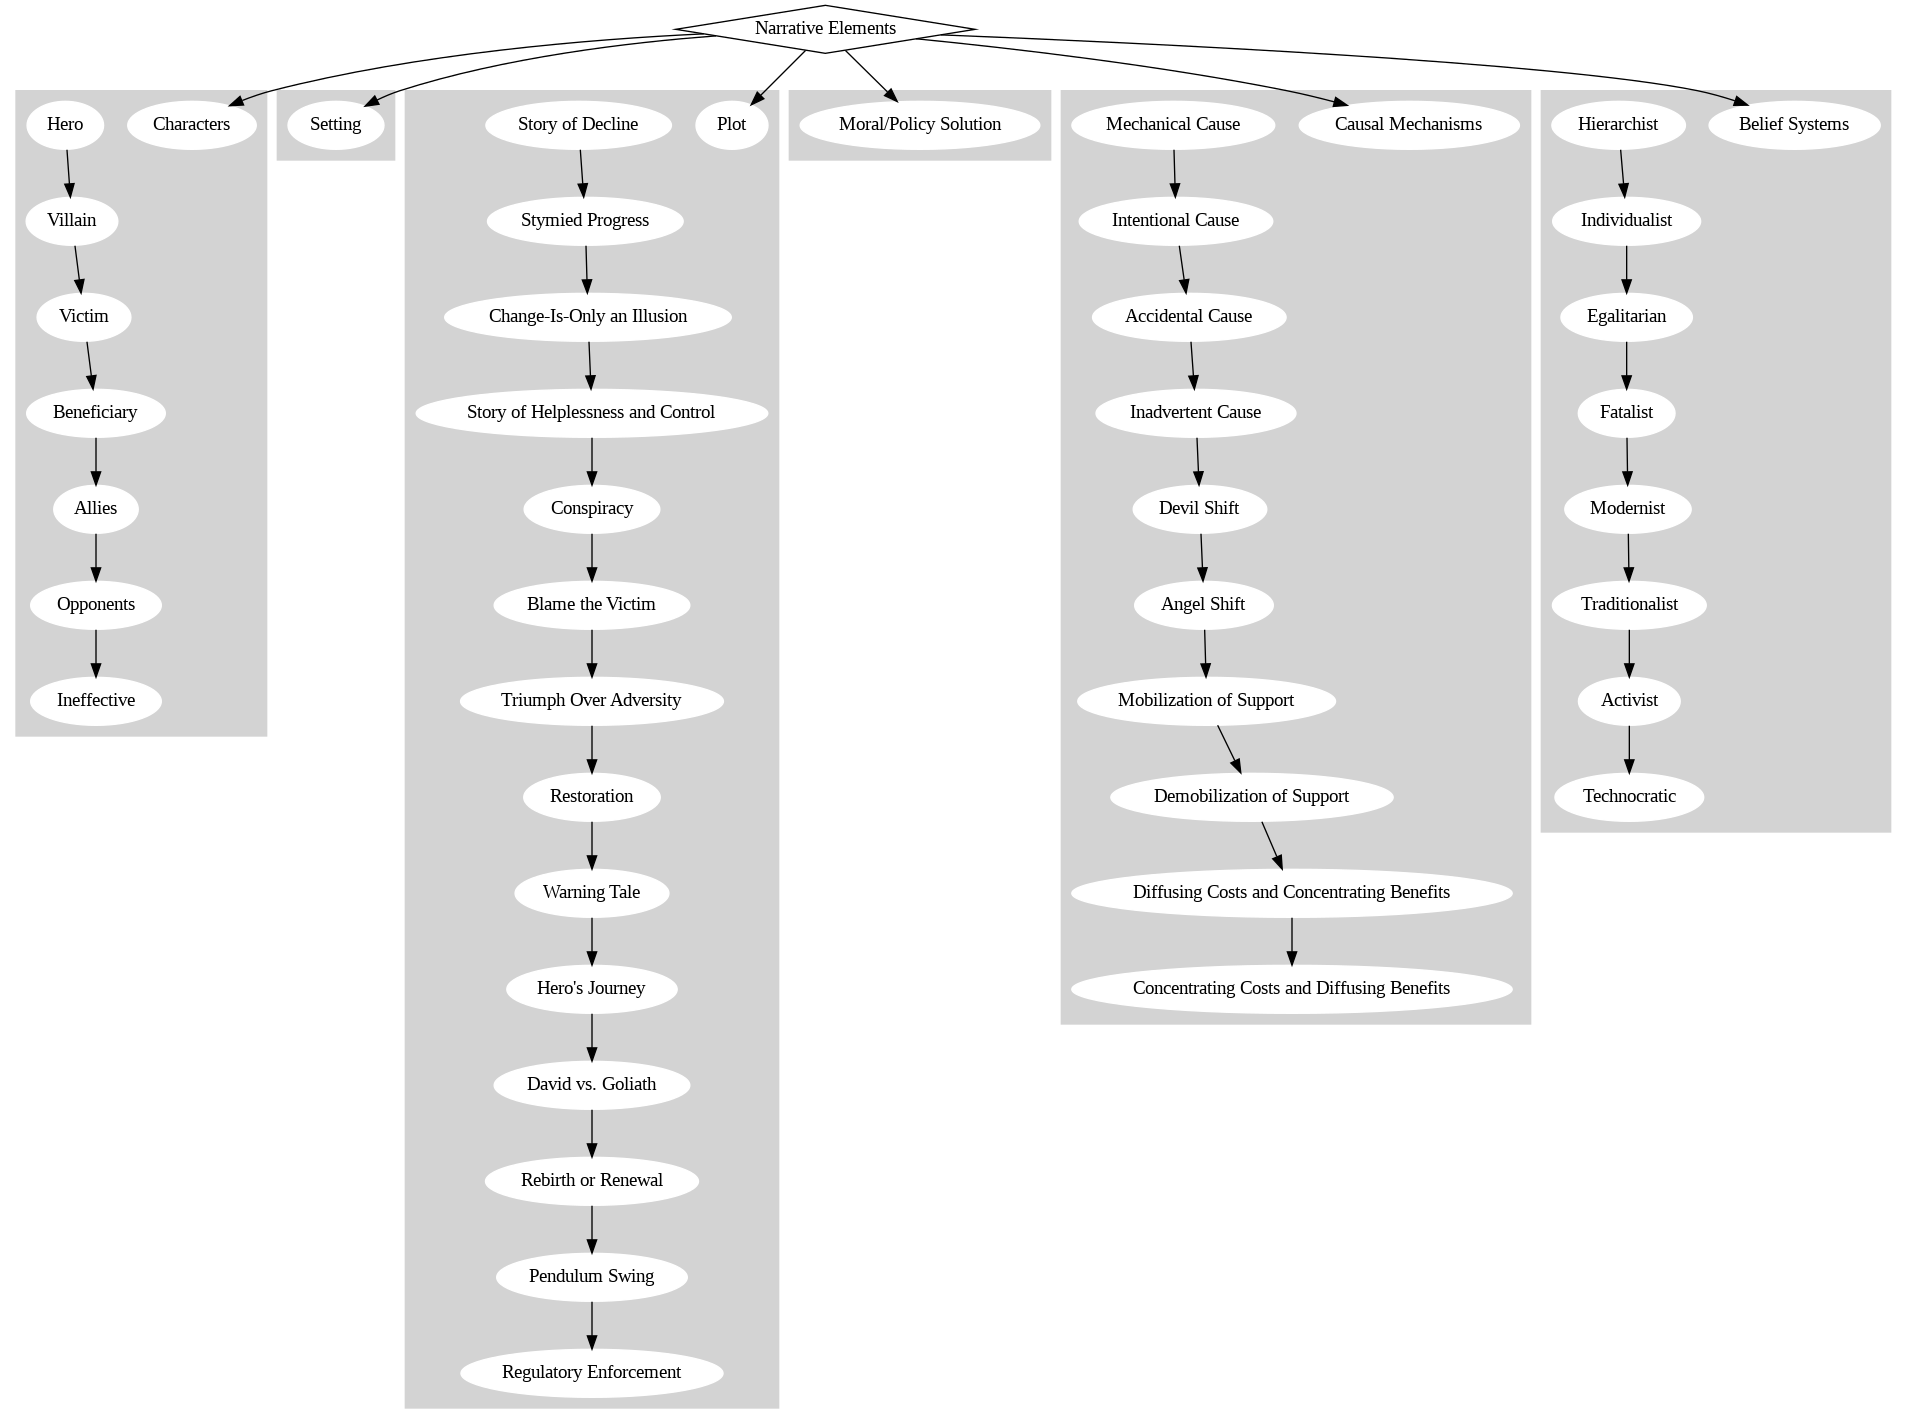

In [ ]:
#@title Graph
from graphviz import Digraph

# Create a new directed graph
dot = Digraph()

# Add start and end nodes
dot.node('Narrative Elements', shape='diamond')

# Add subgraphs for each main category with their subcategories

with dot.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.node('Characters', 'Characters')
    characters = ['Hero', 'Villain', 'Victim', 'Beneficiary', 'Allies', 'Opponents', 'Ineffective']
    for i, char in enumerate(characters):
        c.node(f'char_{i}', char)
    for i in range(len(characters) - 1):
        c.edge(f'char_{i}', f'char_{i + 1}')
    #c.attr(label='Characters')

with dot.subgraph(name='cluster_1') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.node('Setting', 'Setting')

with dot.subgraph(name='cluster_2') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.node('Plot', 'Plot')
    plots = ['Story of Decline', 'Stymied Progress', 'Change-Is-Only an Illusion', 'Story of Helplessness and Control',
             'Conspiracy', 'Blame the Victim', 'Triumph Over Adversity', 'Restoration', 'Warning Tale', 'Hero\'s Journey',
             'David vs. Goliath', 'Rebirth or Renewal', 'Pendulum Swing', 'Regulatory Enforcement']
    for i, plot in enumerate(plots):
        c.node(f'plot_{i}', plot)
    for i in range(len(plots) - 1):
        c.edge(f'plot_{i}', f'plot_{i + 1}')
    #c.attr(label='Plot')

with dot.subgraph(name='cluster_3') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.node('Moral/Policy Solution', 'Moral/Policy Solution')

with dot.subgraph(name='cluster_4') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.node('Causal Mechanisms', 'Causal Mechanisms')
    causal_mechanisms = ['Mechanical Cause', 'Intentional Cause', 'Accidental Cause', 'Inadvertent Cause',
                         'Devil Shift', 'Angel Shift', 'Mobilization of Support', 'Demobilization of Support',
                         'Diffusing Costs and Concentrating Benefits', 'Concentrating Costs and Diffusing Benefits']
    for i, cm in enumerate(causal_mechanisms):
        c.node(f'cm_{i}', cm)
    for i in range(len(causal_mechanisms) - 1):
        c.edge(f'cm_{i}', f'cm_{i + 1}')
    #c.attr(label='Causal Mechanisms')

with dot.subgraph(name='cluster_5') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.node('Belief Systems', 'Belief Systems')
    belief_systems = ['Hierarchist', 'Individualist', 'Egalitarian', 'Fatalist', 'Modernist', 'Traditionalist',
                      'Activist', 'Technocratic']
    for i, bs in enumerate(belief_systems):
        c.node(f'bs_{i}', bs)
    for i in range(len(belief_systems) - 1):
        c.edge(f'bs_{i}', f'bs_{i + 1}')
    #c.attr(label='Belief Systems')

# Add edges from Narrative Elements to main categories
dot.edge('Narrative Elements', 'Characters')
dot.edge('Narrative Elements', 'Setting')
dot.edge('Narrative Elements', 'Plot')
dot.edge('Narrative Elements', 'Moral/Policy Solution')
dot.edge('Narrative Elements', 'Causal Mechanisms')
dot.edge('Narrative Elements', 'Belief Systems')


# Render the graph
dot.render('narrative_elements_diagram_structured', format='png', cleanup=True)

# Display the graph
from IPython.display import Image
Image('narrative_elements_diagram_structured.png')


In [ ]:
# @title Drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Installs
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.3/717.3 kB 19.6 MB/s eta 0:00:00


In [ ]:
#@title Imports
import pandas as pd
import google.generativeai as genai
import os
import time
import pathlib
import textwrap
from IPython.display import display
from IPython.display import Markdown
import regex as re
import json

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Used to securely store your API key
from google.colab import userdata

# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

model = genai.GenerativeModel('gemini-1.5-flash')

In [ ]:
# @title Dataset Loading
# Load the dataset or the checkpoint if it exists
checkpoint_path = '/content/drive/My Drive/Thesis/outputs/output_checkpoint.csv'
final_output_path = '/content/drive/My Drive/Thesis/outputs/output.csv'

def load_data():
    if os.path.exists(checkpoint_path):
        print("Loading from checkpoint...")
        return pd.read_csv(checkpoint_path)
    else:
        print("Loading original dataset...")
        # Load your original dataset here
        return pd.read_csv('/content/drive/MyDrive/Thesis/dataset/sample_news_articles.csv')

df = load_data()

# Define a function that saves the dataframe to a checkpoint
def save_checkpoint(df):
    df.to_csv(checkpoint_path, index=False)

Loading from checkpoint...


In [ ]:
#@title Gemini Prompt
def extract(article):
    response = model.generate_content(f"""You are an expert on narrative policy analysis using the narrative policy framework. In this policy narrative - """+article+""", Using the narrative policy framework and the following codebook -
 A: Unit of Analysis - code everything at a document level.

 B: Narrative Elements - Characters
Narrative Elements - Characters
Definition: Characters are entities portrayed within the narrative, including individuals, groups, organizations, animals, natural phenomena, or abstract concepts. They are depicted as having agency or being acted upon, shaping the plot, themes, and conflicts of the story.
1. Hero
Definition: The potential fixer of the policy issue, taking action with purpose to achieve or oppose a policy solution. Any actor depicted taking positive steps towards air pollution mitigation, advocating for clean air policies, or raising awareness about air pollution’s consequences is considered a hero.
Example: An environmental activist leading a successful campaign to ban single-use plastics in a major city, thereby reducing plastic waste and improving air quality.
2. Villain
Definition: The entity causing the policy problem, creating harm or opposition to the hero's aims.
Example: Large industrial corporations found guilty of illegally dumping toxic waste and emitting high levels of pollutants into the air, despite regulations.
3. Victim
Definition: The one harmed by the villain, affected negatively by an action or inaction.
Example: Residents of a community suffering from respiratory issues due to the nearby factory's unchecked emissions, highlighting the human cost of industrial pollution.
4. Beneficiary
Definition: Those who benefit from the proposed policy solution; could be an animate character who is explicitly stated, directly linked to a hero, and the receiver of an action of a hero.
Example: School children in urban areas who experience improved health outcomes and reduced asthma rates after the implementation of stringent air quality standards.
5. Allies
Definition: Those aligned with the hero, supporting their efforts towards the policy solution.
Example: Non-governmental organizations (NGOs) and community groups collaborating with environmental activists to lobby for stricter air pollution controls and public awareness campaigns.
6. Opponents
Definition: An entity opposing a policy but distinct from a villain, often presenting alternative views or objections to the proposed solutions.
Example: Local businesses that oppose new air quality regulations due to concerns over increased operational costs, arguing that the economic impact outweighs the benefits of cleaner air.
7. Ineffectives
Definition: An entity that performs an action that has no effect on the policy problem.
Example: The government installs smog towers in public areas to reduce air pollution, but the towers cannot work in that setting with that much volume, hence rendering their solution useless and their intervention ineffective.

 C: Narrative Elements - Setting
Definition: Setting is the space where the action of the story takes place over time. It is used to focus the audience's attention to a particular space and time. Settings can be specific locations, like a fracking site, or broader contexts, like the American West. They can be one of the following -
1. Specific Location (e.g., fracking site)
2. Broader Context (e.g., American West)

 D: Narrative Elements - Plot
Definition: Plot is the narrative element that links characters to each other and to the setting, organizing actions, and often highlighting the moral of the story. Plots can be traditional story arcs or thematic frameworks used to convey specific messages. The plots used in this analysis are -
1. Story of Decline
Definition: This plot describes an initial state of well-being that deteriorates over time, highlighting the urgent need for action. It may start with a good situation that worsens or begin at a point where things are already dire.
Example: Articles detailing the gradual increase in air pollution in New Delhi due to unchecked urban expansion and vehicular emissions, emphasizing the resulting severe health impacts and the pressing need for stringent pollution control measures.
2. Stymied Progress
Definition: This plot outlines a trajectory of improvement that is halted or reversed by external interference, emphasizing thwarted efforts towards betterment.
Example: Coverage on how the introduction of the National Clean Air Programme (NCAP) initially led to improvements in air quality across Indian cities, but subsequent political changes and economic pressures, including industrial lobbying, led to a rollback of these gains.
3. Change-Is-Only an Illusion
Definition: This narrative reveals that perceived changes in a situation are misconceptions, with the real situation being stable or moving in the opposite direction.
Example: Reports on Mumbai's air quality improvement efforts, which were believed to be successful due to reduced smog levels. However, further studies revealed that the air quality data was inaccurately reported, and actual pollution levels remained unchanged or worsened.
4. Story of Helplessness and Control
Definition: This plot describes a dire situation initially seen as unchangeable but later shown to be amendable through specific actions or revelations.
Example: Articles about the persistent smog in Kanpur, initially believed to be an unavoidable consequence of industrial activity, which was later significantly reduced through the implementation of stringent environmental regulations and the adoption of advanced pollution control technologies.
5. Conspiracy
Definition: This plot involves a progression from an apparently predetermined state to one where control is exerted by a select few who have been manipulating circumstances for their own benefit.
Example: Investigative pieces uncovering that despite public efforts to reduce emissions, major coal-based power plants had been covertly lobbying against environmental regulations and manipulating emission data to falsely indicate compliance with national standards.
6. Blame the Victim
Definition: This plot centres on issues where those suffering from a problem are inaccurately held responsible for causing it.
Example: In articles discussing poor air quality in rural areas, initial public health campaigns blamed local communities for using traditional biomass for heating and cooking. However, later interventions highlighted the need for systemic solutions, such as providing affordable access to cleaner cooking technologies.
7. Triumph Over Adversity
Definition: This plot revolves around overcoming significant obstacles through resilience and ingenuity, focusing on successful mitigation of air pollution.
Example: Stories of how the city of Pune drastically improved its air quality by adopting electric buses, implementing green building codes, and launching successful grassroots campaigns that mobilized the community towards environmental stewardship.
8. Restoration
Definition: This plot focuses on restoring the environment or social system to its original, pristine condition after suffering degradation, highlighting restorative efforts.
Example: Reports on the restoration of air quality in Hyderabad through large-scale reforestation projects and the adoption of stringent industrial emission standards that have helped revert the city to cleaner air levels seen decades ago.
9. Warning Tale
Definition: This plot serves as a cautionary story about the dire consequences of inaction or improper actions, often projecting a bleak future to motivate current action.
Example: Articles projecting the future health impacts and economic costs of air pollution in Indian megacities if current trends of industrial emissions and vehicular pollution continue without significant intervention, serving as a dire warning to policymakers and the public.
10. Hero's Journey
Definition: This plot follows a protagonist or group undergoing a transformative journey to resolve a crisis, featuring various trials and eventual success.
Example: Features on a policy maker or activist who champions groundbreaking legislation or initiatives, such as the introduction of the Bharat Stage VI emission standards, facing significant opposition from various stakeholders but ultimately succeeding in implementing transformative changes.
11. David vs. Goliath
Definition: This plot highlights the struggle of a seemingly powerless individual or group against a far more powerful adversary, emphasizing justice and equity.
Example: Narratives about small communities or environmental groups, like the residents of Singrauli, taking on large industrial conglomerates and winning legal battles to demand reductions in emissions and accountability for environmental degradation.
12. Rebirth or Renewal
Definition: This plot focuses on transformation and new beginnings after a period of decline or catastrophe, promoting an optimistic and forward-looking perspective.
Example: Stories of how Ahmedabad transformed from a heavily polluted city to a model of urban green living by implementing a series of successful environmental policies, including extensive green spaces, pollution control measures, and sustainable urban planning.
13. Pendulum Swing
Definition: This plot captures the cyclical nature of policy and public sentiment, where attitudes and conditions swing from one extreme to another over time.
Example: Articles illustrating the shifts in air pollution policy in India, from strict regulation under one administration to deregulation under another, and back again, reflecting the changing political landscape and its impact on air quality management.
14. Regulatory Enforcement
Definition: This plot typically involves a structured progression where regulations are introduced, enforced, and the consequences of these actions are observed and analyzed.
Example: Coverage on the introduction of the Graded Response Action Plan (GRAP) in Delhi, detailing how the regulations were enforced during periods of severe air pollution, the immediate impact on air quality, and subsequent analyses of the long-term effectiveness and compliance by various stakeholders.

 E: Narrative Elements - Moral/Policy Solution
Definition: Moral of the Story typically presents the policy solution in the policy narrative, frequently culminating in a call to action. It may directly state policy solutions or offer intermediary steps leading to a larger policy solution. They can be one of the following -
1: Explicit Policy Solution (e.g., ban on fracking)
2: Implicit Policy Reference (e.g., economic benefits)


 F: Narrative Strategies - Causal Mechanisms
Definition: Causal mechanisms in narratives explain how various factors within the story are linked causally. They involve intentional, inadvertent, mechanical, and accidental aspects.
1: Mechanical Cause - does the excerpt associate intended consequences by unguided action with a policy problem? EX: a bad policy might be explained as resulting from an unthinking bureaucracy.
Example: A report may describe air pollution as a consequence of industrial practices that are outdated and no longer regulated properly. It might argue that the emissions are an inevitable outcome of an unthinking adherence to old technology and methods, implying that the bureaucracy has failed to update standards and enforce new regulations, thus unintentionally perpetuating high levels of pollution.
2: Intentional Cause - does the excerpt associate intended consequences by purposeful action with a policy problem? EX: policymakers might be accused of making policies to increase their personal wealth.
Example: Activists might claim that policymakers deliberately resist updating air quality regulations because they receive campaign contributions from big industrial companies. In this view, the persistence of air pollution is portrayed as a direct result of policymakers intentionally acting to protect their own interests and the interests of wealthy donors, at the expense of public health.
3: Accidental Cause - does the excerpt associate unintended consequences by unguided action with a policy problem? EX: climate change might be explained as a natural occurrence having nothing to do with human action.
Example: An article might argue that air pollution has worsened as an unforeseen consequence of urban sprawl and increased vehicle use. The narrative suggests that as cities grew, no one intended to increase pollution; rather, it was an accidental byproduct of the population's desire for more housing and the convenience of personal transportation.
4: Inadvertent Cause - does the excerpt associate unintended consequences by purposeful action with a policy solution? EX: the American Recovery and Reinvestment Act of 2009 might be explained as having raised inflation.
Example: A policy analysis might discuss how efforts to stimulate economic growth through tax incentives for new factories inadvertently led to increased air pollution. Although the policy aimed to reduce unemployment and boost local economies, the unintended side effect was a significant rise in emissions due to increased industrial activity.
5: Devil Shift: Casting villains as the victors over the heroes.
Example: In discussions about air pollution control measures, proponents of strict regulations might depict companies opposing the regulations as villains who prioritize profits over public health, suggesting they have managed to defeat public interest groups by manipulating regulatory processes.
6: Angel Shift: Casting the heroes as the winners.
7: Mobilization of Support: Rally support for a particular policy position.
Example: A campaign might mobilize support for clean air policies by distributing images and stories of people, especially children, affected by asthma due to air pollution, aiming to stir public emotions and encourage citizens to demand action from their representatives.
8: Demobilization of Support: Diminish support for opposing views.
Example: Industry groups might attempt to demobilize support for strict pollution controls by spreading doubt about the scientific consensus on the health impacts of air pollution or by highlighting the potential economic drawbacks, like job losses in the industrial sector.
9: Diffusing Costs and Concentrating Benefits – This strategy involves how the costs and benefits of a proposed policy are distributed among the characters in the narrative. The elite few get the advantage, while the common people pay for it
10: Concentrating Costs and Diffusing Benefits – This strategy involves how the costs and benefits of a proposed policy are distributed among the characters in the narrative. Costs are concentrated and benefits are intended for a larger audience, generally the public.

 G: Belief Systems
Definition: Belief systems are viewpoints or ideological frameworks from cultural theory represented within the narrative, shaping how characters, actions, and events are framed and interpreted. Types of belief systems are -
1. Hierarchist
Definition: Hierarchist belief systems focus on the need for structured regulations and state-led initiatives to tackle air pollution. They advocate for stringent enforcement of emission standards, urban zoning laws, and industrial compliance with environmental regulations.
Example: Articles supporting the implementation of strict government policies to control industrial emissions, emphasizing the importance of hierarchical enforcement mechanisms to ensure compliance.
2. Individualist
Definition: Individualist belief systems emphasize innovation, economic growth, and the role of market mechanisms in solving air pollution. Narratives might promote the development and adoption of new technologies like electric vehicles and market-based solutions such as carbon trading.
Example: Reports highlighting successful startups developing cutting-edge air purification technologies and advocating for carbon trading markets to incentivize pollution reduction.
3. Egalitarian
Definition: Egalitarian belief systems stress community involvement and the impacts of air pollution on public health, particularly for the most vulnerable populations. They advocate for policies that ensure equal distribution of clean air as a shared resource and demand radical changes to reduce emissions, such as banning certain pollutants outright.
Example: Stories emphasizing grassroots movements demanding equitable air quality improvements and policies aimed at protecting low-income communities from disproportionate pollution exposure.
4. Fatalist
Definition: Fatalist belief systems are characterized by skepticism about the efficacy of any interventions. In the context of air pollution, this translates into narratives that depict efforts to improve air quality as doomed to fail due to overwhelming systemic challenges or corruption.
Example: Articles portraying the air pollution crisis as insurmountable due to pervasive governmental corruption and deeply ingrained industrial practices.
5. Modernist
Definition: Modernist belief systems emphasize the power of scientific progress and technological innovation to solve problems, including environmental ones. This belief supports large-scale technological solutions to air pollution, such as the installation of state-of-the-art air purification systems or the development of advanced low-emission public transportation.
Example: Advocating for government investment in renewable energy technologies to reduce reliance on coal-fired power plants, highlighting the role of cutting-edge science in mitigating air pollution.
6. Traditionalist
Definition: Traditionalist belief systems emphasize the importance of cultural heritage, continuity, and adherence to historical lifestyles and practices. This belief advocates for the preservation of traditional practices that have a smaller ecological footprint or criticizes modern industrial methods for disrupting natural and social orders.
Example: Promoting the use of traditional biomass stoves, which are seen as part of cultural heritage despite their contribution to indoor air pollution, and advocating for a return to pre-industrial agricultural practices.
7. Activist
Definition: Activist belief systems focus on direct action and social change, particularly in the face of perceived government inaction or corporate malfeasance. Narratives driven by this belief system mobilize public demonstrations or campaigns to pressure policymakers into taking action against air pollution.
Example: Organizing mass protests demanding stricter air quality regulations and immediate government action to reduce air pollution, featuring vivid accounts of public demonstrations and grassroots campaigns.
8. Technocratic
Definition: Trusts in experts and technical solutions over political or public opinion, emphasizing the role of educated elites and technologists in crafting policy solutions. This could lead to advocacy for solutions based on scientific research and data-driven approaches.
Example: Supporting policies that fund extensive air quality monitoring and research into long-term health impacts of air pollution, used to craft precise interventions based on empirical evidence.

Tell me who the explicitly mentioned heroes, villains, victims, Beneficiaries, Allies,	Opponents, and Ineffectives are in the news article. Also identify the setting, the plot, the presence of ONLY ONE type of each of the following - moral (implicit policy reference or explicit policy solution), belief system, and narrative strategy of the article. Give it to me in a JSON format that is easily parseable, for example -
{
"Hero":"(Name of hero 1, Name of hero 2, etc)",
"Villain":"(Name of Villain 1, Name of Villain 2, etc)",
"Victim":"(Name of Victim 1, Name of Victim 2, etc)",
"Beneficiary":"(Name of Beneficiary 1, Name of Beneficiary 2, etc)",
"Ally":"(Name of Ally 1, Name of Ally 2, etc)",
"Opponent":"(Name of Opponent 1, Name of Opponent 2, etc)",
"Ineffective":"(Name of Ineffective 1, Name of Ineffective 2, etc)",
"Setting":"Name of the place/area",
"Plot":"Name of Plot",
"Moral":"Explicit Policy Solution/Implicit Policy Reference",
"Belief System":"Name of System",
"Narrative Strategy":"Name of Strategy"
}""")
    return response.text

In [ ]:
#@title Main Loop
# Determine the starting point
start_index = df.dropna(subset=['Hero']).shape[0]  # Assuming rows with 'Hero' filled are processed
for index in range(start_index, len(df)):
    start_time = time.time()

    # The extract function
    result = extract(df.loc[index, 'Body'])
    df.at[index, 'Gemini Output'] = result
        # Save the checkpoint every 15 rows
    if (index + 1) % 15 == 0:
        save_checkpoint(df)
        print(f"Checkpoint saved at row {index + 1}")

    elapsed_time = time.time() - start_time
    if elapsed_time < 4:
        time.sleep(4 - elapsed_time)
# Save the final state of the dataframe
df.to_csv(final_output_path, index=False)
print("Analysis complete. Final data saved.")

Checkpoint saved at row 15
Checkpoint saved at row 30
Checkpoint saved at row 45
Checkpoint saved at row 60
Checkpoint saved at row 75
Checkpoint saved at row 90
Checkpoint saved at row 105
Checkpoint saved at row 120
Checkpoint saved at row 135
Checkpoint saved at row 150
Checkpoint saved at row 165
Checkpoint saved at row 180
Checkpoint saved at row 195
Checkpoint saved at row 210
Checkpoint saved at row 225
Checkpoint saved at row 240
Checkpoint saved at row 255
Checkpoint saved at row 270
Checkpoint saved at row 285
Analysis complete. Final data saved.


In [ ]:
# Reload df here
df = pd.read_csv(final_output_path)

In [ ]:
#@title Check for Invalid Format
def extractor(input_string):
  # Define a regular expression to find the JSON part
  json_regex = re.search(r'\{.*?\}', input_string, re.DOTALL)

  if json_regex:
      json_str = json_regex.group(0)
      try:
          json_data = json.loads(json_str)
          #print(json_data)
      except json.JSONDecodeError:
          return "Invalid JSON data"
  else:
      return "No JSON data found"

invalid = 0
no_data = 0
complete = 0

for index, row in df.iterrows():
    result = extractor(row['Gemini Output'])
    if result == "Invalid JSON data":
        invalid += 1
        print("Invalid at " + str(index))
    elif result == "No JSON data found":
        no_data += 1
        print("No data at " + str(index))
    else:
        complete += 1

print("invalid - ", invalid)
print("no_data - ", no_data)
print("complete - ", complete)

# Define the custom exception
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

invalid -  0
no_data -  0
complete -  297


In [ ]:
#@title Stop condition check
# Condition check
if invalid > 0:
    raise StopExecution("Stopping further execution due to invalid JSON format in the data, fix it first.")
else:
    print("All JSON values parseable, continuing execution.")

All JSON values parseable, continuing execution.


In [ ]:
#@title Functions for Parse and Clean
# Functions for parsing
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            # Convert dictionary to a string representation
            dict_str = ', '.join([f"'{sub_k}': '{sub_v}'" for sub_k, sub_v in v.items()])
            items.append((new_key, dict_str))
        else:
            items.append((new_key, v))
    return dict(items)

def dic_and_exp_extractor(result_string):
    dict_match = re.search(r'\{.*?\}', result_string, re.DOTALL)

    data_dict = {}
    explanation_str = ''

    if dict_match:
        dictionary_str = dict_match.group(0)
        explanation_str = result_string[dict_match.end():].strip().replace('Explanation:', '').strip()

        # Clean the dictionary string

        try:
            data_dict = json.loads(dictionary_str)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            data_dict = {}

    return flatten_dict(data_dict), explanation_str

In [ ]:
#@title Application of Parse and Clean
# Apply the function to each row and expand the JSON dictionary into DataFrame columns
df['JSON Part'], df['Explanation'] = zip(*df['Gemini Output'].apply(dic_and_exp_extractor))

# Expand the JSON part into individual columns
json_df = pd.json_normalize(df['JSON Part'])

# Concatenate the new columns with the original DataFrame
df = pd.concat([df.drop(columns=['JSON Part']), json_df], axis=1)

# Drop all columns that are entirely empty (all NaN)
df_cleaned = df.dropna(axis=1, how='all')

# Fill remaining empty cells with 0
df_filled = df_cleaned.fillna(0)

In [ ]:
#@title Valid Values for Categorization of Articles
# List of valid plot values
valid_plots = [
    "Story of Decline", "Stymied Progress", "Change-Is-Only an Illusion",
    "Story of Helplessness and Control", "Conspiracy", "Blame the Victim",
    "Triumph Over Adversity", "Restoration", "Warning Tale", "Hero's Journey",
    "David vs. Goliath", "Rebirth or Renewal", "Pendulum Swing",
    "Regulatory Enforcement", "0"
]

# List of valid Narrative Strategy values
valid_narrative_strategy = [
    "Mechanical", "Intentional", "Accidental", "Inadvertent",
    "Devil-Shift", "Angel-Shift", "Mobilization of Support",
    "Demobilization of Support", "Diffusing Costs and Concentrating Benefits",
    "Concentrating Costs and Diffusing Benefits", "0",
    "Devil Shift", "Angel Shift"
]

# List of valid Moral values
valid_moral = [
    "Explicit Policy Solution", "Implicit Policy Reference", "0"
]

# List of valid Belief System values
valid_belief_system = [
    "Hierarchist", "Individualist", "Egalitarian", "Fatalist",
    "Modernist", "Traditionalist", "Activist", "Technocratic", "0"
]

In [ ]:
#@title Data Cleaning
# General function to check and clean the column and keep count
def clean_column(text, valid_values):
    for value in valid_values:
        if value in text:
            return value, True
    return text, False

# Function to apply the cleaning and count changes by column
def apply_and_count(df, column, valid_values):
    changed_count = 0
    unchanged_count = 0
    def clean_and_count(text):
        nonlocal changed_count, unchanged_count
        cleaned_text, changed = clean_column(text, valid_values)
        if changed:
            changed_count += 1
        else:
            unchanged_count += 1
        return cleaned_text

    df[column] = df[column].apply(clean_and_count)
    return changed_count, unchanged_count

# Dictionary to store counts by column
counts = {}

# Apply to each column and store counts
counts['Plot'] = apply_and_count(df_filled, 'Plot', valid_plots)
counts['Narrative Strategy'] = apply_and_count(df_filled, 'Narrative Strategy', valid_narrative_strategy)
counts['Moral'] = apply_and_count(df_filled, 'Moral', valid_moral)
counts['Belief System'] = apply_and_count(df_filled, 'Belief System', valid_belief_system)

# Display the cleaned dataframe and counts by column
print(counts)

{'Plot': (297, 0), 'Narrative Strategy': (296, 1), 'Moral': (297, 0), 'Belief System': (297, 0)}


In [ ]:
# Function to count instances of 'None Explicitly Mentioned' (case insensitive) before replacement
def count_instances(df, columns, value):
    return {col: df[col].str.lower().eq(value.lower()).sum() for col in columns}

# Count instances before replacement
original_counts = count_instances(df_filled, ['Hero', 'Villain', 'Victim', 'Beneficiary', 'Opponent', 'Ally', 'Ineffective'], 'None Explicitly Mentioned')
#original_counts = count_instances(df, 'None Explicitly Mentioned')

In [ ]:
# Display counts of replacements
print("Counts of 'None Explicitly Mentioned' replaced in each column:", original_counts)

Counts of 'None Explicitly Mentioned' replaced in each column: {'Hero': 0, 'Villain': 0, 'Victim': 0, 'Beneficiary': 0, 'Opponent': 0, 'Ally': 0, 'Ineffective': 0}


In [ ]:
# Replace 'None Explicitly Mentioned' (case insensitive) with 0 in the specified columns
columns_to_replace = ['Hero', 'Villain', 'Victim', 'Beneficiary', 'Opponent', 'Ally', 'Ineffective']
for col in columns_to_replace:
    df_filled[col] = df_filled[col].apply(lambda x: 0 if str(x).lower() == 'none explicitly mentioned' else x)

In [ ]:
# Save the final state of the dataframe
df_filled.to_csv(final_output_path, index=False)
print("Analysis complete. Processed data saved.")

Analysis complete. Processed data saved.
